# Prepare Data

## Import

In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Explore

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [6]:
(df.isna().sum() > 0).sum()

0

## We want to calculate the relative frequencies of the classes

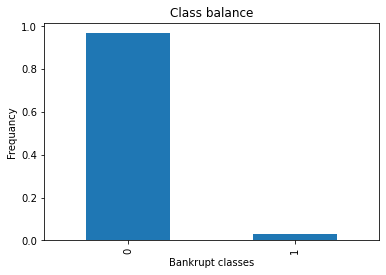

In [7]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

## Split

In [8]:
target = "Bankrupt?"
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [9]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [10]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


In [11]:
X_train.columns

Index(['_ROA(C)_before_interest_and_depreciation_before_interest',
       '_ROA(A)_before_interest_and_%_after_tax',
       '_ROA(B)_before_interest_and_depreciation_after_tax',
       '_Operating_Gross_Margin', '_Realized_Sales_Gross_Margin',
       '_Operating_Profit_Rate', '_Pre-tax_net_Interest_Rate',
       '_After-tax_net_Interest_Rate',
       '_Non-industry_income_and_expenditure/revenue',
       '_Continuous_interest_rate_(after_tax)', '_Operating_Expense_Rate',
       '_Research_and_development_expense_rate', '_Cash_flow_rate',
       '_Interest-bearing_debt_interest_rate', '_Tax_rate_(A)',
       '_Net_Value_Per_Share_(B)', '_Net_Value_Per_Share_(A)',
       '_Net_Value_Per_Share_(C)', '_Persistent_EPS_in_the_Last_Four_Seasons',
       '_Cash_Flow_Per_Share', '_Revenue_Per_Share_(Yuan_¥)',
       '_Operating_Profit_Per_Share_(Yuan_¥)',
       '_Per_Share_Net_profit_before_tax_(Yuan_¥)',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate'

In [12]:
final_selected_features = ['_Net_Income_to_Total_Assets',
                           '_Total_income/Total_expense',
                           '_Borrowing_dependency',
                           '_Retained_Earnings_to_Total_Assets',
                           '_Total_debt/Total_net_worth']

final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

In [13]:
# Better variable names
better_names = [
    'Net_Income_to_Total_Assets_Ratio',
    'Income_to_Expense_Ratio',
    'Borrowing_Dependency_Ratio',
    'Retained_Earnings_to_Assets_Ratio',
    'Debt_to_Net_Worth_Ratio'
]

# Mapping old column names to new column names in a dictionary
rename_dict = {old_name: new_name for old_name, new_name in zip(final_selected_features, better_names)}

# Renaming columns in final_X_train
final_X_train.rename(columns=rename_dict, inplace=True)

# Renaming columns in final_X_test
final_X_test.rename(columns=rename_dict, inplace=True)


/var/folders/py/3tbwxpxj2rq5c6m8d5hwmmm80000gn/T/ipykernel_28758/621149823.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_X_train.rename(columns=rename_dict, inplace=True)
/var/folders/py/3tbwxpxj2rq5c6m8d5hwmmm80000gn/T/ipykernel_28758/621149823.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_X_test.rename(columns=rename_dict, inplace=True)


In [14]:
final_X_train.columns

Index(['Net_Income_to_Total_Assets_Ratio', 'Income_to_Expense_Ratio',
       'Borrowing_Dependency_Ratio', 'Retained_Earnings_to_Assets_Ratio',
       'Debt_to_Net_Worth_Ratio'],
      dtype='object')

## Resample

In [15]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over , y_train_over = over_sampler.fit_resample(final_X_train , y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 5)


,Net_Income_to_Total_Assets_Ratio,Income_to_Expense_Ratio,Borrowing_Dependency_Ratio,Retained_Earnings_to_Assets_Ratio,Debt_to_Net_Worth_Ratio
0,0.801313,0.002299,0.378194,0.940112,0.010735
1,0.810914,0.002312,0.374378,0.937921,0.007986
2,0.809740,0.002361,0.373293,0.943937,0.004126
3,0.810082,0.002341,0.379327,0.936050,0.016674
4,0.804638,0.002289,0.372543,0.936134,0.010057


## Build BaseLine

In [16]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


## iterate

In [17]:
clf = RandomForestClassifier(random_state=42)

In [18]:
params= {
    
    "n_estimators":range(25 , 100 , 25),
    "max_depth": range(10 , 70 , 10)
    
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 70, 10)}

In [19]:
model = GridSearchCV(

    clf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1

)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [20]:
model.fit(X_train_over , y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [21]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.367484,0.065116,0.013108,0.002936,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.992435,0.990544,0.989593,0.992431,0.989593,0.990919,0.001284,1
10,0.364006,0.015158,0.012218,0.002371,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.992435,0.990544,0.989593,0.992431,0.989593,0.990919,0.001284,1
16,0.364964,0.018556,0.012901,0.002199,60,50,"{'max_depth': 60, 'n_estimators': 50}",0.992435,0.990544,0.989593,0.992431,0.989593,0.990919,0.001284,1
7,0.380664,0.020987,0.013531,0.002805,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.992435,0.990544,0.989593,0.992431,0.989593,0.990919,0.001284,1
8,0.564230,0.019726,0.014742,0.002605,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.991489,0.991489,0.989593,0.991958,0.989593,0.990825,0.001020,5
14,0.517766,0.040194,0.017815,0.001652,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.991489,0.991489,0.989593,0.991958,0.989593,0.990825,0.001020,5
11,0.524040,0.033288,0.018022,0.000948,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.991489,0.991489,0.989593,0.991958,0.989593,0.990825,0.001020,5
17,0.443344,0.027979,0.013757,0.001948,60,75,"{'max_depth': 60, 'n_estimators': 75}",0.991489,0.991489,0.989593,0.991958,0.989593,0.990825,0.001020,5
9,0.195411,0.011808,0.008551,0.001202,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.992908,0.991017,0.988174,0.992904,0.988174,0.990635,0.002125,9
12,0.186121,0.011070,0.008220,0.003595,50,25,"{'max_depth': 50, 'n_estimators': 25}",0.992908,0.991017,0.988174,0.992904,0.988174,0.990635,0.002125,9


In [22]:
model.best_params_

{'max_depth': 30, 'n_estimators': 50}

In [23]:
model.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1])

## Evaluate

In [24]:
acc_train = model.score(X_train_over , y_train_over)
acc_test = model.score(final_X_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 1.0
test accuracy: 0.9619


## Let's make a confusion matrix to see how our model is making its correct and incorrect predictions.

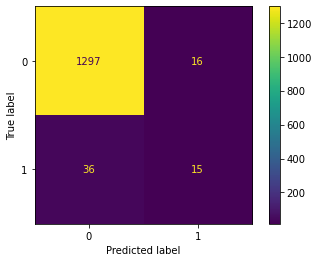

In [25]:
ConfusionMatrixDisplay.from_estimator(

    model,
    final_X_test,
    y_test
    
);

## Let`s make a Classification report to look at the whole picture of the classification model performances. A classification report includes precision, recall, F1 score and support.

In [26]:
print(classification_report(

    y_test,
    model.predict(final_X_test)

))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.48      0.29      0.37        51

    accuracy                           0.96      1364
   macro avg       0.73      0.64      0.67      1364
weighted avg       0.95      0.96      0.96      1364



## Communication

In [27]:
features = final_X_test.columns
importances = model.best_estimator_.feature_importances_

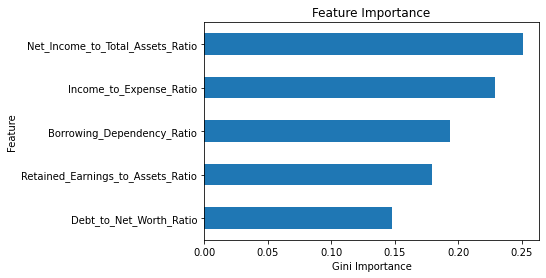

In [28]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [29]:
pickle.dump(model, open('model-1.pkl', 'wb') )

In [30]:
final_X_test

,Net_Income_to_Total_Assets_Ratio,Income_to_Expense_Ratio,Borrowing_Dependency_Ratio,Retained_Earnings_to_Assets_Ratio,Debt_to_Net_Worth_Ratio
239,0.765336,0.002054,0.369637,0.922162,0.001595
2850,0.817797,0.002402,0.376524,0.946527,0.007164
2687,0.847518,0.002417,0.369637,0.948985,0.003319
6500,0.767650,0.002143,0.393783,0.920257,0.029799
2684,0.810394,0.002430,0.384317,0.935565,0.014674
...,...,...,...,...,...
1357,0.811952,0.002308,0.371510,0.952919,0.005957
3946,0.812144,0.002279,0.369637,0.936733,0.001399
5491,0.796622,0.002233,0.380594,0.931594,0.013915
2112,0.787758,0.002024,0.380711,0.929671,0.017126


In [32]:
final_selected_features = ['_Net_Income_to_Total_Assets',
                           '_Total_income/Total_expense',
                           '_Borrowing_dependency',
                           '_Retained_Earnings_to_Total_Assets',
                           '_Total_debt/Total_net_worth',
                           'Bankrupt?']

df1 = df[final_selected_features]
df1 = df[final_selected_features]

In [33]:
df1

,_Net_Income_to_Total_Assets,_Total_income/Total_expense,_Borrowing_dependency,_Retained_Earnings_to_Total_Assets,_Total_debt/Total_net_worth,Bankrupt?
0,0.716845,0.002022,0.390284,0.903225,0.021266,1
1,0.795297,0.002226,0.376760,0.931065,0.012502,1
2,0.774670,0.002060,0.379093,0.909903,0.021248,1
3,0.739555,0.001831,0.379743,0.906902,0.009572,1
4,0.795016,0.002224,0.375025,0.913850,0.005150,1
...,...,...,...,...,...,...
6814,0.799927,0.002266,0.373823,0.925611,0.006655,0
6815,0.799748,0.002288,0.372505,0.932629,0.004623,0
6816,0.797778,0.002239,0.369637,0.932000,0.001392,0
6817,0.811808,0.002395,0.369649,0.939613,0.003816,0
